## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_mouse_data = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")

# pandas day 3 activity 1&2

# Display the data table for preview
complete_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
# pandas day 1 activity 11 

mice_number = len(complete_mouse_data['Mouse ID'].unique())
mice_number

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# this isn't covered in the material, here is a link to the way you should do this:
#https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

duplicate_count=len(complete_mouse_data)-len(complete_mouse_data.drop_duplicates())
duplicate_count

1

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# use loc with result of previous cell
duplicate_mice = complete_mouse_data[complete_mouse_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice = pd.DataFrame({"Mouse ID":duplicate_mice["Mouse ID"].unique()})

duplicate_mice=complete_mouse_data.loc[complete_mouse_data["Mouse ID"]==str(duplicate_mice.iloc[0,0]),:]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_mouse_data.loc[complete_mouse_data['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
# # pandas day 1 activity 11 (same as above)
clean_mice_number = len(clean_df['Mouse ID'].unique())
clean_mice_number

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df = clean_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_volume_median = summary_df['Tumor Volume (mm3)'].median()
tumor_volume_var = summary_df['Tumor Volume (mm3)'].var()
tumor_volume_std = summary_df['Tumor Volume (mm3)'].std()
tumor_volume_sem = summary_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_regimen_df = pd.DataFrame({'Mean': tumor_volume_mean, 'Median': tumor_volume_median, 'Variance': tumor_volume_var,
                                   'Standard Deviation': tumor_volume_std, 'SEM': tumor_volume_sem})

## this is pretty much exactly like the Pandas HW.
# Assemble the resulting series into a single summary dataframe.


summary_regimen_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
## this wasn't shown in class, here is a link (look at last example):
##https://www.geeksforgeeks.org/how-to-combine-groupby-and-multiple-aggregate-functions-in-pandas/

summary_agg_data=summary_df.agg({"Tumor Volume (mm3)": ["mean", 
                                                        "median", 
                                                        "var", 
                                                        "std", 
                                                        "sem"],})
summary_agg_data.head()



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

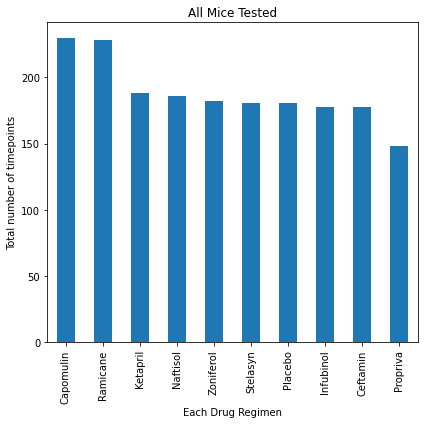

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
## matplotlib day 2 activity 4.  Remember .value_counts will give you all unique values and their counts.
drug_regimen = clean_df['Drug Regimen'].value_counts()
drug_regimen.plot(kind="bar",figsize=(6,6))

# Set the xlabel and ylabel using class methods
plt.xlabel("Each Drug Regimen")
plt.ylabel("Total number of timepoints")
plt.title("All Mice Tested")
plt.tight_layout()


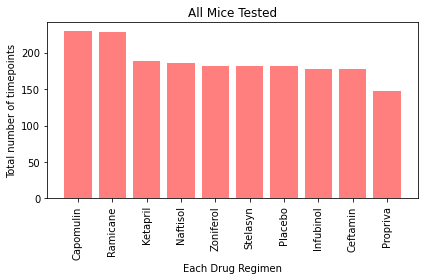

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
## same as previous cell with diff method.  Use matplotlib.pyplot.bar().
## matplotlib day 1 activity 7

# Tell matplotlib that we will be making a bar chart
x_axis = drug_regimen.index.values
plt.bar(x_axis, drug_regimen.values, color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")

plt.title("All Mice Tested")
plt.xlabel("Each Drug Regimen")
plt.ylabel("Total number of timepoints")

plt.tight_layout()

<AxesSubplot:ylabel='Sex'>

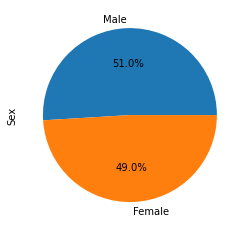

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
## use the 'Sex' column and pandas to create Pie, day 2 activity 5
sex_df = clean_df['Sex'].value_counts()
sex_df.plot(kind="pie", autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

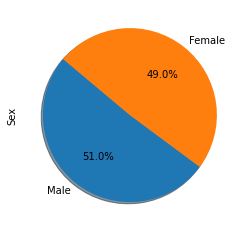

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
## same data, but use matplotlib Day 1 Activity 9
plt.pie(sex_df.values, labels=sex_df.index.values,autopct="%1.1f%%", shadow=True, startangle=140)
plt.ylabel('Sex') 

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
## pandas day 1 activity 11 
## you may want to reset the index to make it easier to work with.

Greatest_timepoint_df = pd.DataFrame(clean_df.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
## Pandas day 3 activity 1
merged_timepoint_df= pd.merge(clean_df, Greatest_timepoint_df, how='right', on=('Mouse ID', 'Timepoint'))
merged_timepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


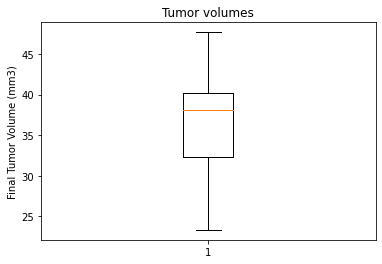

The IQR for Capomulin is : 7.781863460000004
The Upper quartile for Capomulin is: 87.66645829999999
The Lower quartile for Capomulin is: 25.355449580000002
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
The Number of Capomulin outliers is: 1


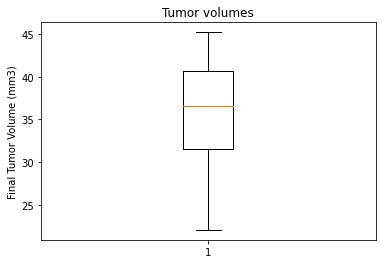

The IQR for Ramicane is : 9.098536719999998
The Upper quartile for Ramicane is: 51.83201549
The Lower quartile for Ramicane is: 20.70456164999999
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The Number of Ramicane outliers is: 0


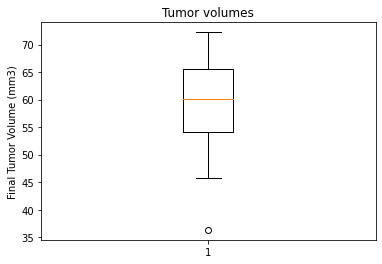

The IQR for Infubinol is : 11.477135160000003
The Upper quartile for Infubinol is: 54.30681135
The Lower quartile for Infubinol is: 17.912664470000003
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The Number of Infubinol outliers is: 18


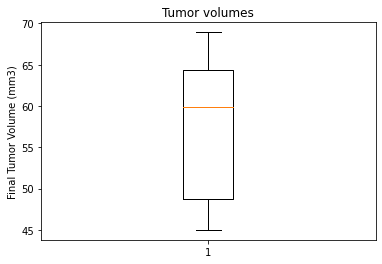

The IQR for Ceftamin is : 15.577752179999997
The Upper quartile for Ceftamin is: 82.74144559000001
The Lower quartile for Ceftamin is: 36.83290494999999
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The Number of Ceftamin outliers is: 0


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
## The treatment names are in the instructions.
drug_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
## this will be a loop through each treatment.
# give quartile calculations
# Locate the rows which contain mice on each drug and get the tumor volumes
# ## using lock create a dataframe with the tumor volumes('Tumor Volume (mm3)) for each drug
# add subset 

## matplotlib day 3 activity 2
#loop
for Each_drug in drug_list:

    df = merged_timepoint_df.loc[merged_timepoint_df['Drug Regimen'] == Each_drug]
   
    values = df['Tumor Volume (mm3)']
## append it to the empty list   
    tumor_vol_values.append(values)
# Determine outliers using upper and lower bounds  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_count = (values.loc[(df['Tumor Volume (mm3)'] >= upper_bound) | (df['Tumor Volume (mm3)'] <= lower_bound)]).count()
  
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    fig1, ax1 = plt.subplots()
    ax1.set_title('Tumor volumes')
    ax1.set_ylabel('Final Tumor Volume (mm3)')
    ax1.boxplot(values)
    plt.show()
 
    
    print(f'The IQR for {Each_drug} is : {iqr}') 
    print(f'The Upper quartile for {Each_drug} is: {upper_bound}')
    print(f'The Lower quartile for {Each_drug} is: {lower_bound}')
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f'The Number of {Each_drug} outliers is: {outliers_count}')


    

    

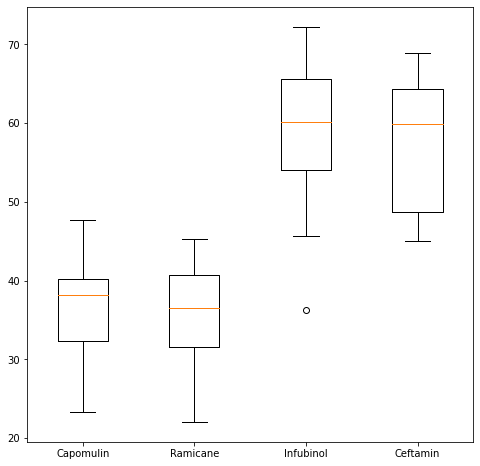

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
## matplotlib day 3 activity 2
fig= plt.figure(figsize =(8,8))
plt.boxplot(tumor_vol_values, labels=drug_list) 
ax.set_title('Final tumor volume of each mouse')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

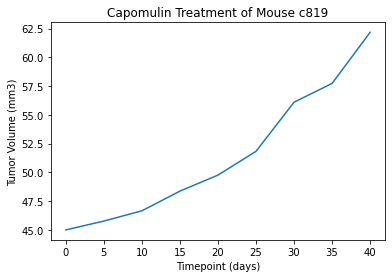

In [63]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
## use loc to filter data down to a specific mouse and the treatment Capomulin
capomulin_mouse = clean_df.loc[clean_df['Mouse ID'] == 'c819']
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse c819")
plt.show()


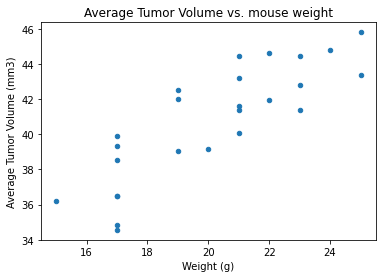

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
## same loc as above but second data point is an Average from the filtered data.
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
avg_renamed = capomulin_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
Avg_tumor_volume =avg_renamed.groupby(['Mouse ID']).mean()
Avg_tumor_volume.head()
Avg_tumor_volume.plot(kind="scatter", 
                      x="Weight (g)", 
                      y="Average Tumor Volume (mm3)", 
                      figsize=(6,4),  title="Average Tumor Volume vs. mouse weight"  )
plt.show()

## Correlation and Regression

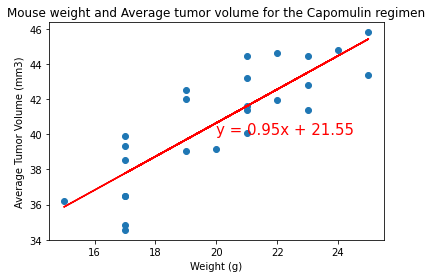

The correlation between weight and average tumor volume for the Capomulin regimen is 
0.84.


In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
## matplotlib day 3 activity 6+
capomulin_df = complete_mouse_data.loc[complete_mouse_data['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

# Add the linear regression equation and line to plot
x_value = final_avg_vol_df['Weight (g)']
y_value = final_avg_vol_df['avg_tumor_vol']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Mouse weight and Average tumor volume for the Capomulin regimen')
plt.show()

# Calculate the correlation coefficient
correlation = st.pearsonr(x_value,y_value)

print(f"""The correlation between weight and average tumor volume for the Capomulin regimen is 
{round(correlation[0],2)}.""")

